In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import random
import math
import urllib
from urllib.parse import urlparse

In [2]:
df = pd.read_csv('malicious_phish.csv')

print(df.shape)
df

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [3]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [4]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [5]:
df.type.value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

Text(0, 0.5, 'count')

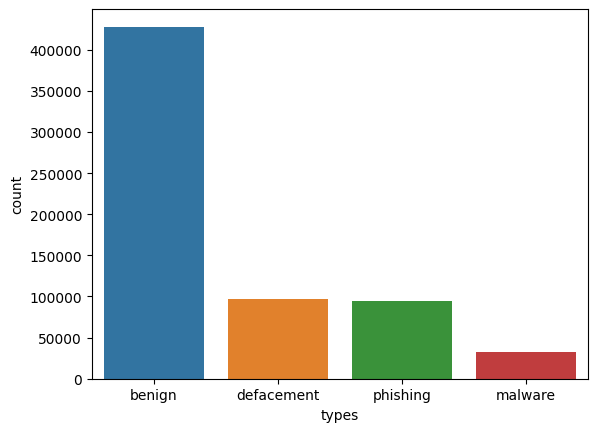

In [6]:
sns.barplot(x=df.type.value_counts().index, y=df.type.value_counts())
plt.xlabel('types')
plt.ylabel('count')

In [7]:
def is_url_ip_address(url: str) -> bool:
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
    
df['is_ip'] = df['url'].apply(lambda i: is_url_ip_address(i))

In [8]:
df

,url,type,is_ip
0,br-icloud.com.br,phishing,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0


In [9]:
df.is_ip.value_counts()

0    638703
1     12488
Name: is_ip, dtype: int64

In [10]:
df['url_len'] = df['url'].apply(lambda x: len(str(x)))
df

,url,type,is_ip,url_len
0,br-icloud.com.br,phishing,0,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,39
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,44
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,42
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,45


In [11]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//', '~']
for a in feature:
    df[a] = df['url'].apply(lambda i: i.count(a))

In [12]:
df.describe()

,is_ip,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,~
count,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000
mean,0.019177,60.156831,0.002219,0.223782,1.550421,0.603863,2.195453,0.000871,0.519502,0.068432,0.000238,0.000954,0.000395,0.004823,0.292453,0.013451
std,0.137147,44.753902,0.054183,0.441220,2.973790,1.516960,1.490732,0.032327,4.462254,0.621276,0.023544,0.039546,0.074938,0.152428,0.461838,0.117740
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,77.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,2175.000000,10.000000,20.000000,87.000000,51.000000,42.000000,6.000000,231.000000,37.000000,6.000000,5.000000,54.000000,15.000000,9.000000,8.000000


In [13]:
df

,url,type,is_ip,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,~
0,br-icloud.com.br,phishing,0,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,0,0,0,0,0,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,39,0,0,0,0,3,0,0,0,0,0,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,44,0,0,2,0,2,0,0,0,0,0,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,42,0,0,0,0,2,0,0,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,45,0,0,0,0,2,0,0,0,0,0,0,0,0,0


In [14]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
#path level
df

,url,type,is_ip,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,~,count_dir
0,br-icloud.com.br,phishing,0,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,0,0,0,0,0,0,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,39,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,44,0,0,2,0,2,0,0,0,0,0,0,0,0,0,4
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,42,0,0,0,0,2,0,0,0,0,0,0,0,0,0,4
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,45,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2


In [15]:
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))
df

,url,type,is_ip,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,~,count_dir,count_embed_domian
0,br-icloud.com.br,phishing,0,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,0,0,0,0,0,0,1,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,39,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,44,0,0,2,0,2,0,0,0,0,0,0,0,0,0,4,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,42,0,0,0,0,2,0,0,0,0,0,0,0,0,0,4,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,45,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0


In [16]:
df.count_embed_domian.value_counts()

0    650205
1       974
2        12
Name: count_embed_domian, dtype: int64

In [17]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))
df

,url,type,is_ip,url_len,@,?,-,=,.,#,...,+,$,!,*,",",//,~,count_dir,count_embed_domian,short_url
0,br-icloud.com.br,phishing,0,16,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,0,0,0,0,0,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,0,0,0,0,0,0,3,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,...,0,0,0,0,0,1,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,39,0,0,0,0,3,0,...,0,0,0,0,0,0,0,3,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,44,0,0,2,0,2,0,...,0,0,0,0,0,0,0,4,0,1
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,42,0,0,0,0,2,0,...,0,0,0,0,0,0,0,4,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,45,0,0,0,0,2,0,...,0,0,0,0,0,0,0,2,0,0


In [18]:
df.short_url.value_counts()

0    611436
1     39755
Name: short_url, dtype: int64

In [19]:
df['count_https'] = df['url'].apply(lambda i : i.count('https'))
df.loc[df['count_https'] > 0, 'https'] = 1
df.loc[df['count_https'] == 0, 'https'] = 0
df.https.value_counts()

0.0    634768
1.0     16423
Name: https, dtype: int64

In [20]:
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))
df

,url,type,is_ip,url_len,@,?,-,=,.,#,...,*,",",//,~,count_dir,count_embed_domian,short_url,count_https,https,hostname_length
0,br-icloud.com.br,phishing,0,16,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0.0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,0,0,0,2,0,0,0,0.0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,0,0,0,3,0,0,0,0.0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,...,0,0,1,0,1,0,0,0,0.0,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,...,0,0,1,0,1,0,0,0,0.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,39,0,0,0,0,3,0,...,0,0,0,0,3,0,0,0,0.0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,44,0,0,2,0,2,0,...,0,0,0,0,4,0,1,0,0.0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,42,0,0,0,0,2,0,...,0,0,0,0,4,0,1,0,0.0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,45,0,0,0,0,2,0,...,0,0,0,0,2,0,0,0,0.0,0


In [21]:
df = df.drop(['count_https'], axis=1)
df

,url,type,is_ip,url_len,@,?,-,=,.,#,...,!,*,",",//,~,count_dir,count_embed_domian,short_url,https,hostname_length
0,br-icloud.com.br,phishing,0,16,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0.0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,0,0,0,0,2,0,0,0.0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,0,0,0,0,3,0,0,0.0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,...,0,0,0,1,0,1,0,0,0.0,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,...,0,0,0,1,0,1,0,0,0.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,39,0,0,0,0,3,0,...,0,0,0,0,0,3,0,0,0.0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,44,0,0,2,0,2,0,...,0,0,0,0,0,4,0,1,0.0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,42,0,0,0,0,2,0,...,0,0,0,0,0,4,0,1,0.0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,45,0,0,0,0,2,0,...,0,0,0,0,0,2,0,0,0.0,0


In [22]:
df['dash_in_hostname'] = df['url'].apply(lambda i: urlparse(i).netloc.count('-'))
df

,url,type,is_ip,url_len,@,?,-,=,.,#,...,*,",",//,~,count_dir,count_embed_domian,short_url,https,hostname_length,dash_in_hostname
0,br-icloud.com.br,phishing,0,16,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0.0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,0,0,0,2,0,0,0.0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,0,0,0,3,0,0,0.0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,...,0,0,1,0,1,0,0,0.0,21,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,...,0,0,1,0,1,0,0,0.0,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,39,0,0,0,0,3,0,...,0,0,0,0,3,0,0,0.0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,44,0,0,2,0,2,0,...,0,0,0,0,4,0,1,0.0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,42,0,0,0,0,2,0,...,0,0,0,0,4,0,1,0.0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,45,0,0,0,0,2,0,...,0,0,0,0,2,0,0,0.0,0,0


In [23]:
df.dash_in_hostname.value_counts()

0     624104
1      23138
2       3328
3        325
4        218
5         54
6         13
7          4
11         2
9          2
8          1
10         1
12         1
Name: dash_in_hostname, dtype: int64

In [28]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr|bonus|money|prize|draw|share|reward|spin',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_words'] = df['url'].apply(lambda i: suspicious_words(i))
df

,url,type,is_ip,url_len,@,?,-,=,.,#,...,",",//,~,count_dir,count_embed_domian,short_url,https,hostname_length,dash_in_hostname,sus_words
0,br-icloud.com.br,phishing,0,16,0,0,1,0,2,0,...,0,0,0,0,0,0,0.0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,0,0,2,0,0,0.0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,0,0,3,0,0,0.0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,...,0,1,0,1,0,0,0.0,21,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,...,0,1,0,1,0,0,0.0,23,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,39,0,0,0,0,3,0,...,0,0,0,3,0,0,0.0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,44,0,0,2,0,2,0,...,0,0,0,4,0,1,0.0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,42,0,0,0,0,2,0,...,0,0,0,4,0,1,0.0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,45,0,0,0,0,2,0,...,0,0,0,2,0,0,0.0,0,0,0


In [29]:
df.sus_words.value_counts()

0    604710
1     46481
Name: sus_words, dtype: int64

In [30]:
df.describe()

,is_ip,url_len,@,?,-,=,.,#,%,+,...,",",//,~,count_dir,count_embed_domian,short_url,https,hostname_length,dash_in_hostname,sus_words
count,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,...,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000
mean,0.019177,60.156831,0.002219,0.223782,1.550421,0.603863,2.195453,0.000871,0.519502,0.068432,...,0.004823,0.292453,0.013451,2.317042,0.001533,0.061050,0.025220,5.023088,0.049274,0.071378
std,0.137147,44.753902,0.054183,0.441220,2.973790,1.516960,1.490732,0.032327,4.462254,0.621276,...,0.152428,0.461838,0.117740,1.566924,0.039586,0.239422,0.156793,8.911953,0.259963,0.257456
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,77.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
max,1.000000,2175.000000,10.000000,20.000000,87.000000,51.000000,42.000000,6.000000,231.000000,37.000000,...,15.000000,9.000000,8.000000,39.000000,2.000000,1.000000,1.000000,236.000000,12.000000,1.000000


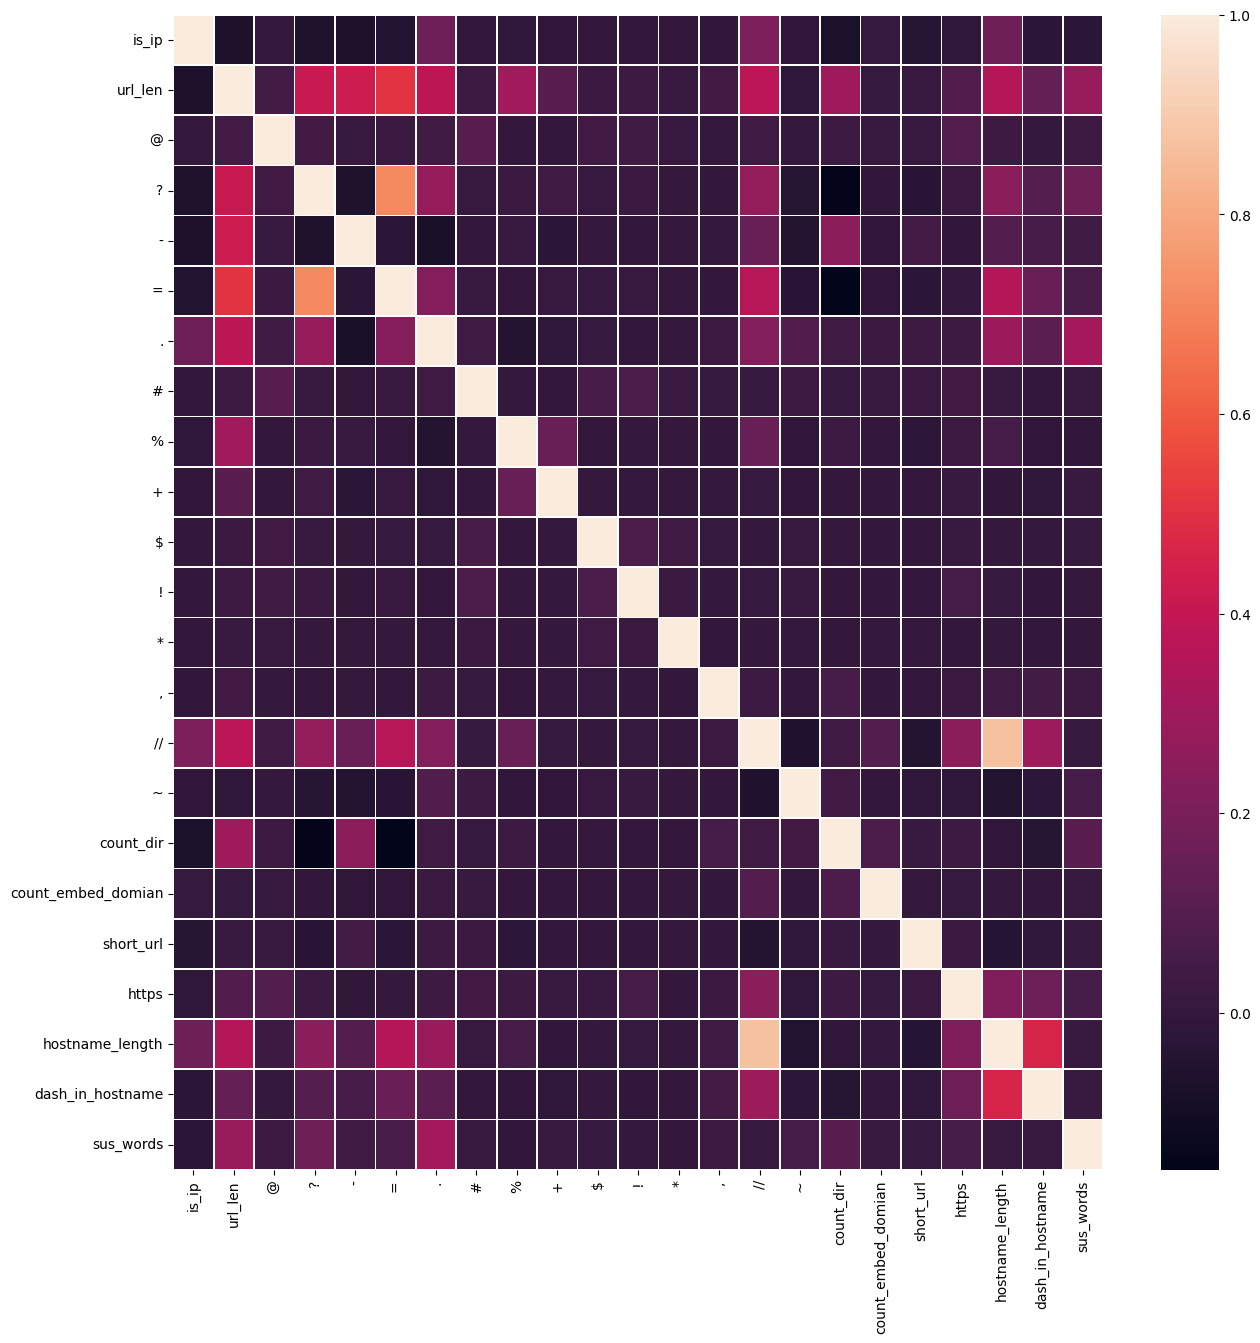

In [31]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

In [32]:
df


,url,type,is_ip,url_len,@,?,-,=,.,#,...,",",//,~,count_dir,count_embed_domian,short_url,https,hostname_length,dash_in_hostname,sus_words
0,br-icloud.com.br,phishing,0,16,0,0,1,0,2,0,...,0,0,0,0,0,0,0.0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,0,0,2,0,0,0.0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,0,0,3,0,0,0.0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,...,0,1,0,1,0,0,0.0,21,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,...,0,1,0,1,0,0,0.0,23,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,39,0,0,0,0,3,0,...,0,0,0,3,0,0,0.0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,44,0,0,2,0,2,0,...,0,0,0,4,0,1,0.0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,42,0,0,0,0,2,0,...,0,0,0,4,0,1,0.0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,45,0,0,0,0,2,0,...,0,0,0,2,0,0,0.0,0,0,0


In [43]:
X = df.drop(['type', 'url'], axis=1)
X

,is_ip,url_len,@,?,-,=,.,#,%,+,...,",",//,~,count_dir,count_embed_domian,short_url,https,hostname_length,dash_in_hostname,sus_words
0,0,16,0,0,1,0,2,0,0,0,...,0,0,0,0,0,0,0.0,0,0,0
1,0,35,0,0,0,0,2,0,0,0,...,0,0,0,2,0,0,0.0,0,0,0
2,0,31,0,0,0,0,2,0,0,0,...,0,0,0,3,0,0,0.0,0,0,0
3,0,88,0,1,1,4,3,0,0,0,...,0,1,0,1,0,0,0.0,21,1,0
4,0,235,0,1,1,3,2,0,0,0,...,0,1,0,1,0,0,0.0,23,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,0,39,0,0,0,0,3,0,0,0,...,0,0,0,3,0,0,0.0,0,0,0
651187,0,44,0,0,2,0,2,0,0,0,...,0,0,0,4,0,1,0.0,0,0,0
651188,0,42,0,0,0,0,2,0,0,0,...,0,0,0,4,0,1,0.0,0,0,0
651189,0,45,0,0,0,0,2,0,0,0,...,0,0,0,2,0,0,0.0,0,0,0


In [44]:
y = df.type
y

0           phishing
1             benign
2             benign
3         defacement
4         defacement
             ...    
651186      phishing
651187      phishing
651188      phishing
651189      phishing
651190      phishing
Name: type, Length: 651191, dtype: object

In [45]:
y = y.replace('phishing', 1).replace('defacement', 1).replace('malware', 1).replace('benign', 0)
y

0         1
1         0
2         0
3         1
4         1
         ..
651186    1
651187    1
651188    1
651189    1
651190    1
Name: type, Length: 651191, dtype: int64

In [46]:
y.value_counts()

0    428103
1    223088
Name: type, dtype: int64

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(488393, 23) (162798, 23)
(488393,) (162798,)


In [48]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test) 
result = accuracy_score(y_test, y_pred)
print("Random Forest accuracy: ", result)

Random Forest accuracy:  0.9429354168970134
